In [18]:
# Auto formatting
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [19]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [20]:
df = pd.read_csv("../data/cleaned.csv", index_col=[0])
display(df)

,loan_amount,term,income,Credit_Score,Status,loan_limit_cf,loan_limit_ncf,submission_of_application_not_inst,submission_of_application_to_inst,co-applicant_credit_type_CIB,...,Region_North-East,Region_central,Region_south,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,116500,360.0,1740.0,758,1,1,0,0,1,1,...,0,0,1,1,0,0,0,0,0,0
1,206500,360.0,4980.0,552,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,406500,360.0,9480.0,834,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
3,456500,360.0,11880.0,587,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,696500,360.0,10440.0,602,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135103,436500,180.0,7860.0,659,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
135104,586500,360.0,7140.0,569,0,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,0
135105,446500,180.0,6900.0,702,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
135106,196500,180.0,7140.0,737,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [36]:
X = df.drop("Credit_Score", axis=1)
creditscore = df.loc[:, "Credit_Score"]
y = np.transpose(creditscore) #1x38837


<IPython.core.display.Javascript object>

In [22]:
def standardizeData(data):
    # Takes pandas dataframe and standardizes it iteratively
    for column in data:
        if (data[column] != 0).sum() == 0:  # If the column is all zeros
            continue  # No need to standardize all zeros (thus dividing by zero)
        else:
            data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
    return data

<IPython.core.display.Javascript object>

In [23]:
X_standardized = standardizeData(X)

<IPython.core.display.Javascript object>

In [37]:
# Start analysis with value of arbitrary value of lambda
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X_standardized, y, test_size=0.3, random_state=0
)

n, m = Xtrain.shape
I = np.identity(m)
alpha = 0.1
beta = np.dot(
    np.dot(np.linalg.inv(np.dot(Xtrain.T, Xtrain) + alpha * I), Xtrain.T), Ytrain
)
display(beta)

array([ 0.16425598,  0.86347088,  1.54063351, -1.06608209,  0.32611192,
       -0.3261121 , -0.53590844,  0.53590844,  0.07166453, -0.07166449,
       -0.15090106,  0.15089972,  0.15089972, -0.15090106,  0.15089972,
       -0.15090106, -0.10114697,  0.10114683,  0.75935421, -0.75935415,
        1.04811053, -1.04811065,  0.23516351, -0.23516348, -0.29113394,
        0.29113366,  1.74434298, -1.74434289, -0.85742968,  0.85742958,
       -0.93731417,  0.34203634,  0.80210675, -0.2957819 ,  0.2351635 ,
        0.15530076, -0.95162092, -1.13880788,  0.19149827,  1.03529033,
       -0.39671357, -1.55636844,  2.11066426,  1.99826528,  0.70078375,
       -0.81995655,  0.38808793, -0.16940663, -0.40212394, -0.49873151,
        1.26950089, -0.44435253,  1.08588703, -2.14718266, -0.11548124,
       -0.6488125 ,  1.27701016, -1.09913247,  1.80774501, -0.21400894,
        0.01018924, -0.97933424, -2.61188247])

<IPython.core.display.Javascript object>

In [38]:
variables = X.columns.tolist()
model_coef = pd.DataFrame({"abs coef": abs(beta), "coef": beta, "names": variables})
display(
    model_coef[model_coef["abs coef"] != 0].sort_values(by="abs coef", ascending=False)
)

,abs coef,coef,names
62,2.611882,-2.611882,age_>74
53,2.147183,-2.147183,Region_North-East
42,2.110664,2.110664,total_units_3U
43,1.998265,1.998265,total_units_4U
58,1.807745,1.807745,age_45-54
...,...,...,...
16,0.101147,-0.101147,interest_only_int_only
17,0.101147,0.101147,interest_only_not_int
8,0.071665,0.071665,co-applicant_credit_type_CIB
9,0.071664,-0.071664,co-applicant_credit_type_EXP


<IPython.core.display.Javascript object>

[0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8]


(0.07, 2.93, -2.8480067831086466, 2.3467891549242776)

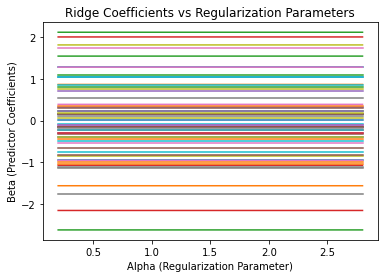

<IPython.core.display.Javascript object>

In [42]:
from sklearn.linear_model import Ridge
import scipy as sp

coef = []
alphas = np.arange(0.2, 3, 0.2)
print(alphas)
allData = pd.DataFrame({"alphas": alphas})
for a in alphas:
    # ridgereg = Ridge(alpha=a)
    # ridgereg.fit(Xtrain, Ytrain)
    beta = sp.linalg.inv((Xtrain.T @ Xtrain) + a * I) @ Xtrain.T @ Ytrain
    # coef.append(ridgereg.coef_)
    coef.append(beta)
    # print(beta)


## Make plot of Beta as a function of Alpha
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas, coef)
ax.set_xlabel("Alpha (Regularization Parameter)")
ax.set_ylabel("Beta (Predictor Coefficients)")
ax.set_title("Ridge Coefficients vs Regularization Parameters")
ax.axis("tight")


# import plotly.graph_objects as go

# fig = go.Figure()

# fig.add_Trace(go.Scatter(x))